In [1]:
# Importing Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re
import logging, warnings
from PIL import Image
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")

In [2]:
# Import NLP Packages
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import stylecloud
from textblob import Word, TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dheerajk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_path = "../../../yelp_dataset/"

In [5]:
# Reading Reviews dataset CSV File
reviews_df = pd.read_csv(data_path + "reviews_eda.csv")
reviews_df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(reviews_df.shape)
reviews_df.head()

(345849, 13)


,review_id,user_id,business_id,stars,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count
0,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015,1,00:01:03,48,243,4.900000,12
1,T_kAb2NeylB-JdNDKphryw,Z-xgVb4nM42943m2wbBkFw,kxX2SOes4o-D3ZQBkiMRfA,5.0,We've eaten here 3 times and it seems that eac...,2017-01-02 14:25:26,2017,1,14:25:26,66,341,4.246154,26
2,NENaCqb6TNj5CyY1LOdI6Q,2SEoXb6r6hPKrl9V9VzBgA,kxX2SOes4o-D3ZQBkiMRfA,5.0,Came to Philly for a family event but stayed a...,2015-07-28 17:15:20,2015,7,17:15:20,28,149,4.357143,13
3,l-bH0C-PSXmVs-vQqMfJ1Q,toFm0jWZJKqsOmHE7kMbRA,kxX2SOes4o-D3ZQBkiMRfA,5.0,A very neat little hole in the wall. Very clea...,2015-06-21 01:11:14,2015,6,01:11:14,23,131,4.739130,8
4,qr7acpL3ZzP7cAmXaax93w,cMvau1VAjuKo_ah0ZBck1g,kxX2SOes4o-D3ZQBkiMRfA,4.0,This place was a great find. I'd say its a 4.5...,2015-12-06 01:36:28,2015,12,01:36:28,91,465,4.120879,32


## Text Processing

In [6]:
# Pre-compile the regular expression
punctuation_re = re.compile(r'[^\w\s]')

def clean_text(text):
    # Lowercase the text and remove punctuation
    text = punctuation_re.sub('', text.lower())

    # Split the text only once and process words
    processed_words = []
    for word in text.split():
        if word not in stop_words:
            # Lemmatize the word
            lemmatized_word = Word(word).lemmatize()
            processed_words.append(lemmatized_word)
    
    return ' '.join(processed_words)

# Use vectorization for operations that can be vectorized
reviews_df['cleaned_text'] = reviews_df['text'].str.lower().str.replace(punctuation_re, '', regex=True)

# Apply the clean_text function for the rest of the operations
reviews_df['cleaned_text'] = reviews_df['cleaned_text'].apply(clean_text)

# Print the head of the DataFrame
reviews_df.sample(5)


,review_id,user_id,business_id,stars,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text
3288,YObtwosddIgVkaeJB2MfVQ,8q5D_K2xkyR26Sil-YretQ,FnEkr6LzjuGsg93Z7fkl7Q,2.0,A bar where you can get drinks but the bartend...,2018-09-09 23:22:03,2018,9,23:22:03,45,263,4.866667,20,bar drink bartendersobviously manager walk emp...
235361,v9UOrtvf9XGZArGnKWoyGg,_EXT8rzsCfxAxSAmAQFe0g,UdcLHHBRIxtelgbKBnhitA,3.0,We went on a Thursday night and the line was o...,2017-07-15 14:06:24,2017,7,14:06:24,124,699,4.688525,44,went thursday night door left around 830pm pro...
38739,BsR7eCDk3U9GvbcMK9gNug,TjLx5K1DmYw-oSlhOEVO5Q,Iw8uqNPxviwcgxtruAx_LA,1.0,I went back after many years last night. Same ...,2015-04-05 12:29:46,2015,4,12:29:46,33,173,4.272727,11,went back year last night hosting policy crapp...
292511,cg119bjpHUlbof92GP5ppg,RtiMv7brJ-8nCwU_1RM3VQ,Og1HekJMHKqsvtWaUp9V8g,4.0,I would DEFINITELY revisit this bake shop. I o...,2016-11-08 23:52:26,2016,11,23:52:26,94,512,4.436170,29,definitely revisit bake shop ordered lemon bar...
222596,37ZZx4VHr2847NZJjTKaZQ,J_v42xK6BG7VdYiK3EkN3w,99e7bysta1myyrQogFEWUQ,4.0,I went to Dock Street for lunch on a weekend t...,2016-02-10 16:04:20,2016,2,16:04:20,160,834,4.207547,68,went dock street lunch weekend pizza heard muc...


## Text Classification Using Textblob

Sentiment analysis involves identifying the sentiment or emotional state of the writer or user, whether it is positive, negative, or neutral.

The sentiment function in Textblob provides two properties: polarity and subjectivity.

Polarity is a floating-point value that ranges from -1 to 1. A polarity of 1 indicates a positive statement, while -1 indicates a negative statement.

Subjective sentences typically express personal opinions, emotions, or judgments, while objective sentences convey factual information. Subjectivity is also represented as a floating-point value ranging from 0 to 1.

In [7]:
# Calculate polarity and subjectivity score

from textblob import TextBlob

def calculate_sentiment(text):
    sentiment = TextBlob(text).sentiment
    return sentiment.polarity, sentiment.subjectivity

# Apply the function and create a temporary DataFrame
temp_df = reviews_df['cleaned_text'].apply(calculate_sentiment)
temp_df = temp_df.apply(pd.Series)

# Assign the calculated values to the original DataFrame
reviews_df['polarity'] = temp_df[0]
reviews_df['subjectivity'] = temp_df[1]

# Print the head of the DataFrame
reviews_df.sample(5)


,review_id,user_id,business_id,stars,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity
103498,ik6UO77va_4A_jj1xAxZlw,YytWZlPo48X9kG7ADn7wyQ,DhBe7gF3li2eCYRjwi2_Hw,5.0,The best chirashi I've had in the Philadelphia...,2019-06-27 04:18:20,2019,6,04:18:20,60,382,5.366667,17,best chirashi ive philadelphia area bar none f...,0.542316,0.651840
157313,4_Deu7iKj1CidfKkJcZazQ,v9FT1O5vdOHlzOYpyc-Y2w,S9IFCU4FKCqEriV1Rr2ZcA,5.0,"Really effing good. Just quality, yo. In an ...",2019-09-05 13:14:25,2019,9,13:14:25,35,193,4.968750,11,really effing quality yo area saturated like m...,0.250000,0.850000
249292,ec75mpoUPFzTQwdakJPJ4g,tKQr6M_odoFLMzqT65vAwQ,cOXc8c85Ms6dMEAJazLXHQ,5.0,I really dug this place. Classic old Irish div...,2018-07-24 02:33:05,2018,7,02:33:05,66,370,4.492537,22,really dug place classic old irish dive bar af...,0.220833,0.295833
231417,eZ3HGW0zxCmYKrfpFwNqGA,TGCw-jSGw2V_M04qB9S-DQ,Uky0DD3LU4C7eyNDhpmOXg,5.0,"Very friendly, good breakfast food! Followed c...",2020-09-03 19:35:44,2020,9,19:35:44,19,113,5.000000,2,friendly breakfast food followed covid guideli...,0.187500,0.250000
164155,8Lk5hLyXWwSSsioGi7xZgw,A08xF_ykmsWQV0ypYA8wkA,Qw7tz-UkPrpXaVidWuab4Q,5.0,"I came here on a Wednesday, which has extended...",2016-01-27 20:34:47,2016,1,20:34:47,208,1188,4.802956,76,came wednesday extended evening hour payasyouw...,0.249123,0.471592


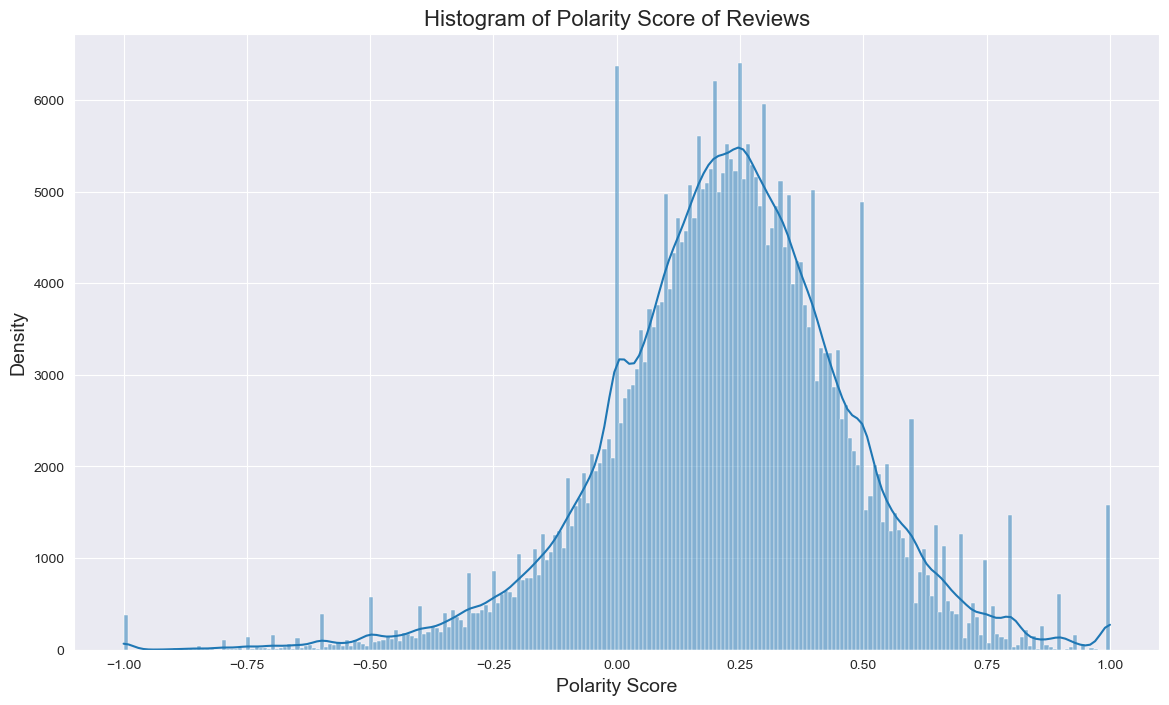

In [8]:
# Histogram of Polarity Score of Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.histplot(reviews_df['polarity'], kde=True)
plt.title('Histogram of Polarity Score of Reviews', fontsize=16)
plt.xlabel('Polarity Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


This histogram shows a more normal distribution, where on average most reviews are generally more positive (>0) than negative (<0).

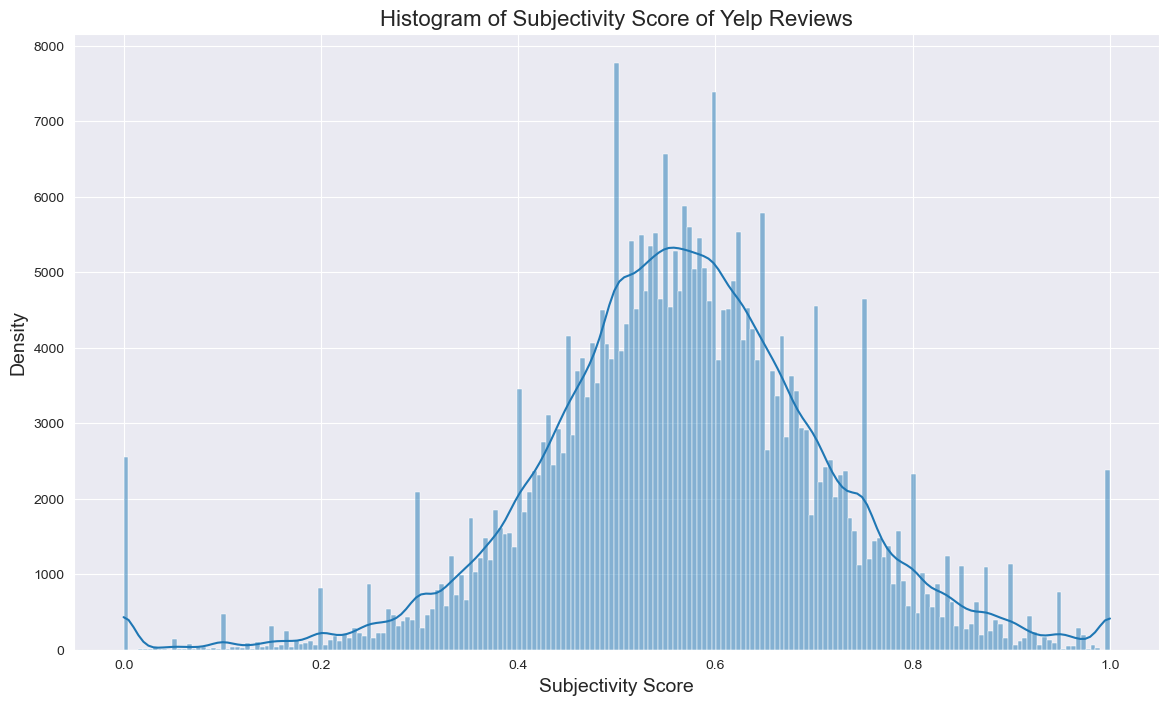

In [9]:
# Histogram of Subjectivity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.histplot(reviews_df['subjectivity'], kde=True)
plt.title('Histogram of Subjectivity Score of Yelp Reviews', fontsize=16)
plt.xlabel('Subjectivity Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


The distribution of reviews also conforms to a normal distribution, indicating that, on average, most reviews strike a balance between subjectivity and objectivity.

## Vader Sentiment Analysis

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based tool used to analyze sentiment expressed in social media texts. VADER uses lexical features like words that are generally labeled as either positive or negative.

VADER has been found to work well when analyzing sentiments in social media, New York Times editorials, movie reviews, and product reviews. This is because in addition to providing positivity and negativity scores, VADER also gives a compound score that indicates how positive or negative the overall sentiment is.

The compound score is calculated by summing the valence scores of each word after adjusting based on rules, and then normalizing the total into a number between -1 (most extremely negative) and +1 (most extremely positive).


In [10]:
# Calculate Vader Sentiment Analysis Scores

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment = reviews_df['text'].apply(lambda x: analyzer.polarity_scores(x)).apply(pd.Series)
reviews_df = pd.concat([reviews_df,sentiment],axis=1)
reviews_df.sample(5)

,review_id,user_id,business_id,stars,text,date,year,month,time,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
341031,MaEwz1o54Myk1LhGY_JlqQ,h99O47kP446lHkSii80-jg,ZZeW-9eJ-QjB2dpA1WKleg,5.0,Love the clock bar! I've been going here for w...,2020-05-03 01:18:07,2020,5,01:18:07,52,288,4.557692,19,love clock bar ive going well 18 yr food fresh...,0.376562,0.587500,0.000,0.637,0.363,0.9753
268867,WIYDPbXSgvEYsoPukE2zXQ,ESrvZwHVdEVo-A6vYL6new,LQZdcwfqneUIrZTy1VvWfg,5.0,I live in NoLibs and have eaten in and enjoyed...,2017-05-10 18:25:04,2017,5,18:25:04,48,257,4.375000,17,live nolibs eaten enjoyed delivery baan thai 2...,0.404545,0.687500,0.000,0.725,0.275,0.9460
181252,H9WS4eq0-CZz1JGH1vokig,DMykhB-sUeUrcmQbp6zFCA,bIGFd99r3iUNB0xshlZ5Sw,1.0,Would not seat us in en empty restaurant! Howe...,2016-10-12 23:28:54,2016,10,23:28:54,33,189,4.558824,14,seat u en empty restaurant however menu lackin...,0.133333,0.444444,0.123,0.877,0.000,-0.5414
264164,PXuB63lBo6y1eoXOk9ZcSQ,8EMU7d4pCkdqUnvlIW40CA,oqy15jhe1lOXttEvd4Srog,3.0,El Poquito is a new Mexican restaurant in Ches...,2015-05-07 16:44:07,2015,5,16:44:07,153,788,4.297297,68,el poquito new mexican restaurant chestnut hil...,0.173631,0.380392,0.045,0.816,0.139,0.9406
48297,IlUPveHP2p19Fbfnx8i_7g,X7zm8FuL1iDfIbfFK9WFBg,KfIPQSLSj_rJ9zbsdO7wFQ,3.0,Its crazy how many good reviews this place has...,2018-02-08 02:55:31,2018,2,02:55:31,177,947,4.288136,64,crazy review place came pretty high expectatio...,-0.114167,0.479048,0.030,0.893,0.077,0.8719


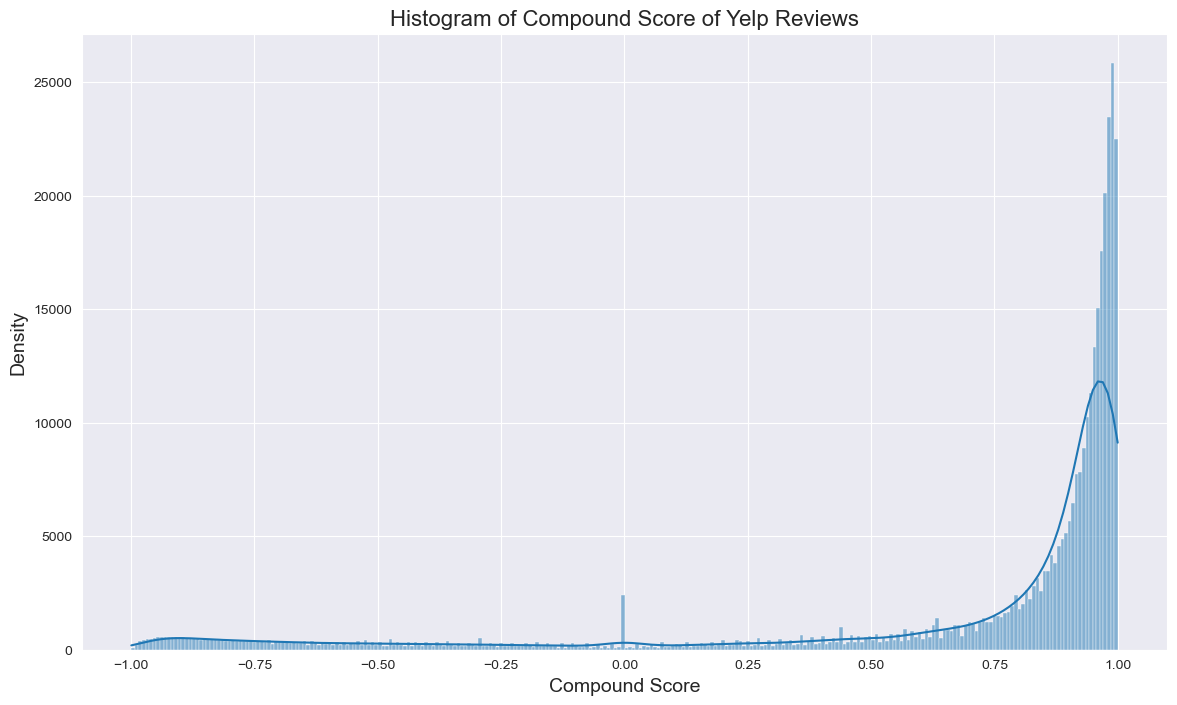

In [11]:
# Histogram of Compound Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14, 8))
sns.histplot(reviews_df['compound'], kde=True)
plt.title('Histogram of Compound Score of Yelp Reviews', fontsize=16)
plt.xlabel('Compound Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


The distribution of reviews is left-skewed, suggesting that most reviews have a compound score close to 1.0, indicating positivity according to Vader Sentiment Analysis. It is intriguing to note that the distribution of polarity scores for the reviews is more normally distributed, which contrasts with the heavily positive skew of the compound scores.

After generating additional sentiment scores, we will later combine these scores to create our overall super score rating.


In [12]:
reviews_df.to_csv(data_path + "reviews_sentiment.csv")